# Matplot Examples

## Basics


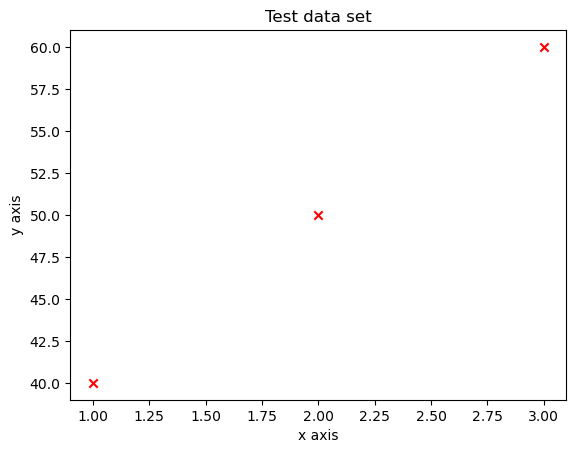

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([40, 50, 60])

# Create a scatter plot
plt.scatter(x, y, marker="x", c="r")
plt.title("Test data set")

# Set axis labels
plt.xlabel("x axis")
plt.ylabel("y axis")

# Display the plot

plt.show()

## Draw multiple plots using plot() and subplots()
You can plot multiple lines within the same axes using multiple calls to `plt.plot()`. However, there's a fundamental difference between using multiple calls to `plt.plot()` and using `plt.subplots()` to create separate subplots.

When you use multiple calls to `plt.plot()` in the same figure, you're plotting multiple datasets or curves on the same axes. In the following example, both the sine and cosine curves would be displayed within the same plot. This can be useful when you want to compare or visualize the relationships between different datasets directly.

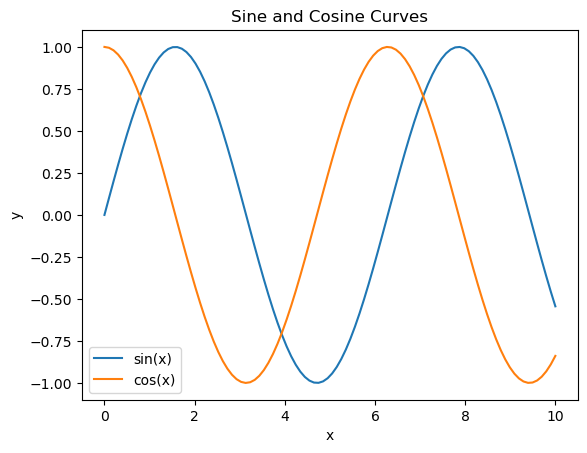

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, label="cos(x)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and Cosine Curves")
plt.legend()
plt.show()

On the other hand, when you use `plt.subplots()` to create separate subplots, you're dividing the figure into multiple smaller plots or axes, each displaying its own dataset or curve. This can be useful when you want to visualize different aspects of the data or compare multiple datasets side by side without overlapping them.

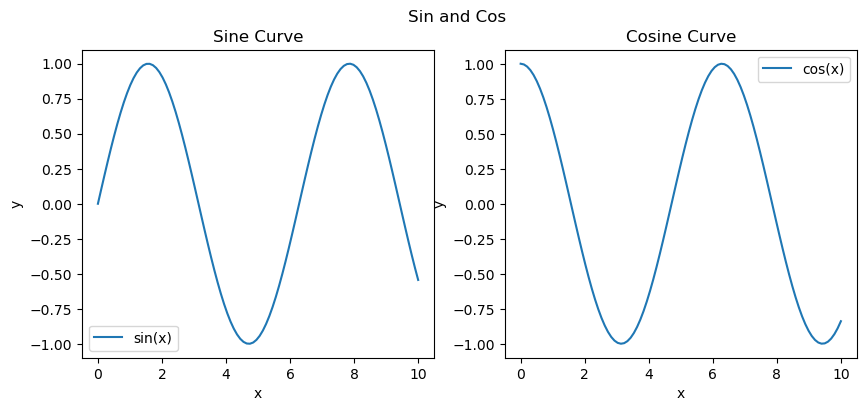

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Sin and Cos")

axs[0].plot(x, y1, label="sin(x)")
axs[0].set_title("Sine Curve")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()

axs[1].plot(x, y2, label="cos(x)")
axs[1].set_title("Cosine Curve")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend()

plt.show()

Using multiple calls to `plt.plot()` displays multiple datasets or curves within the same axes, while using `plt.subplots()` creates separate subplots for each dataset or curve. The choice depends on your specific visualization goals and preferences.

### `figure` object
The `fig` object returned by `plt.subplots()` is an instance of the `matplotlib.figure.Figure` class. While it's true that the example does not explicitly use the `fig` object, it's still useful for various purposes, such as customizing the figure appearance, saving the figure to a file, and more.

Here are some common use cases for the `fig` object:

1. Adjusting the figure size: You can set the figure size using the `figsize` parameter when calling `plt.subplots()`, but you can also modify the figure size after it's created using the `fig.set_size_inches()` method.

```python
fig.set_size_inches(10, 5)
```

2. Adding a title for the entire figure: While individual subplots can have their own titles, you may want to add a title for the entire figure. You can do this using the `fig.suptitle()` method.

```python
fig.suptitle("Figure Title")
```

3. Saving the figure to a file: You can save the entire figure as an image file (e.g., PNG, JPEG, PDF) using the `fig.savefig()` method.

```python
fig.savefig("my_figure.png")
```

4. Adjusting spacing between subplots: The `fig.subplots_adjust()` method allows you to modify the spacing between subplots within the figure.

```python
fig.subplots_adjust(hspace=0.5, wspace=0.3)
```

5. Adding custom elements to the figure: You can use the `fig` object to add custom elements, such as text, lines, or shapes, to the figure. For example, you can add text using the `fig.text()` method.

```python
fig.text(0.5, 0.5, "Custom Text")
```

These are just a few examples of how the `fig` object can be used in a Matplotlib visualization. The `fig` object provides many more methods and properties for customizing and working with the figure, allowing you to create more complex and customized visualizations.

### Arranging the subplots
If you want to create 4 subplots for 4 sine curves of different frequencies, you can adjust the subplot arrangement accordingly. Here's an example of creating 4 subplots using a 2x2 grid:


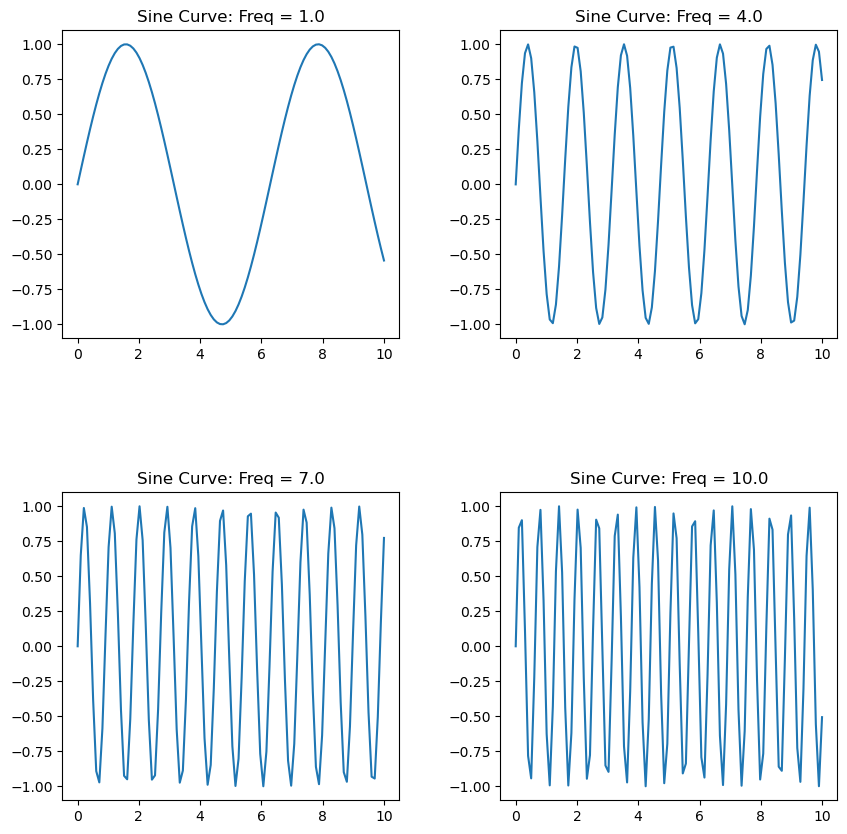

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 100)
frequencies = np.linspace(1, 10, 4)

# Create a 2x2 subplot grid (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through the subplots and plot sine curves with different frequencies
for i in range(2):
    for j in range(2):
        freq = frequencies[i * 2 + j]
        y = np.sin(freq * x)
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f"Sine Curve: Freq = {freq}")

# Add some padding between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the plots
plt.show()

## 3D Plot - Convex

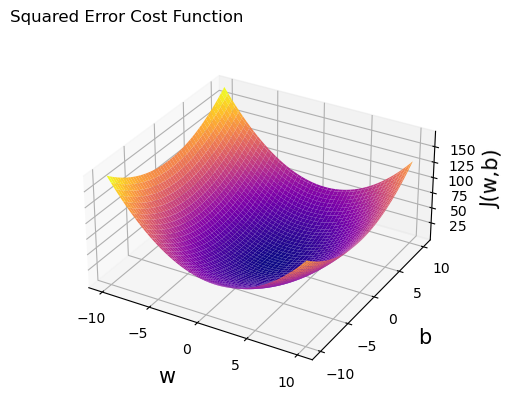

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a simple symmetric dataset
x_data_symmetric = np.array([-2, -1, 0, 1, 2])
y_data_symmetric = np.array([-2, -1, 0, 1, 2])  # Linear relationship y = x


# Use the conventional squared error cost function with 1/2m factor
def symmetric_cost_function(w, b, x_data, y_data):
    m = len(x_data)  # number of data points
    predictions = w * x_data + b  # linear model predictions
    squared_error = (predictions - y_data) ** 2  # squared error
    return (1 / (2 * m)) * np.sum(squared_error)


# Define range for w and b
w = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w, b)

# Create the cost function values for each (w, b) pair using the symmetric data
J_symmetric = np.array(
    [
        [
            symmetric_cost_function(
                w_val, b_val, x_data_symmetric, y_data_symmetric
            )
            for w_val in w
        ]
        for b_val in b
    ]
)

# Plot the 3D surface with the symmetric cost function J(w, b)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the surface with the updated symmetric cost function J(w, b)
surface = ax.plot_surface(W, B, J_symmetric, cmap="plasma")


# Label the axes
ax.set_xlabel("w", labelpad=10, fontsize=15)
ax.set_ylabel("b", labelpad=10, fontsize=15)
ax.set_zlabel("J(w,b)", fontsize=15)
ax.set_title("Squared Error Cost Function" + " " * 50)

# Set the aspect ratio to equal for w and b to ensure symmetry in the plot
ax.set_box_aspect([1, 1, 0.5])  # Aspect ratio for w, b, and J

# Show the plot
plt.show()

## 3D Plot - Non-Convex

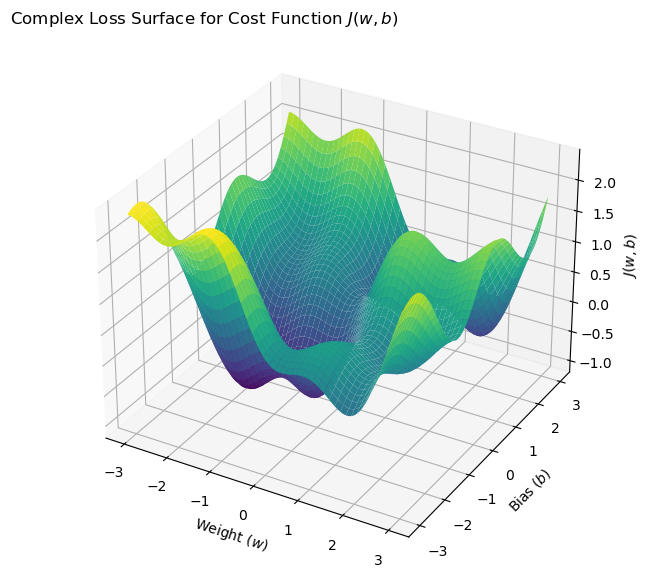

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define a non-symmetric loss function with one global minimum
def non_symmetric_loss_with_global_minimum(w, b):
    return (
        np.sin(w) * np.cos(b)
        + 0.5 * np.sin(2 * b)
        - 0.3 * np.cos(3 * w)
        + 0.1 * (w**2 + b**2)
    )


# Generate the grid of values for w and b
x_vals = np.linspace(-3, 3, 400)  # These represent 'w' values
y_vals = np.linspace(-3, 3, 400)  # These represent 'b' values
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the cost function values
Z_global_minimum = non_symmetric_loss_with_global_minimum(X, Y)

# Create the 3D plot
fig_updated_title = plt.figure(figsize=(10, 7))
ax_updated_title = fig_updated_title.add_subplot(111, projection="3d")

# Plot the non-symmetric loss surface with one global minimum
ax_updated_title.plot_surface(
    X, Y, Z_global_minimum, cmap="viridis", edgecolor="none"
)

# Set the labels for the axes and the title
ax_updated_title.set_title(
    "Complex Loss Surface for Cost Function $J(w, b)$" + " " * 50
)
ax_updated_title.set_xlabel("Weight ($w$)")
ax_updated_title.set_ylabel("Bias ($b$)")
ax_updated_title.set_zlabel("$J(w, b)$")

# Display the plot
plt.show()